Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis(EDA)

In [3]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The column names is given above.

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We have 5 int64 type data, 2 float64 type data and 5 object type data in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

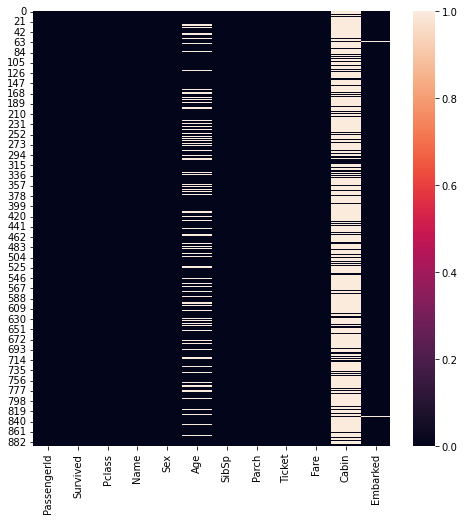

In [6]:
#checking for null values through heatmap and info function
df.info()
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

Here we can see there are null values present in Age, Cabin and Embarked.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are null values present in Age(177 rows), cabin(687 rows) and Embarked(2 rows).
Almost 20% of data in age is missing. We can replace this data using imputation. But for the cabin column 77% data is missing, which is quite huge. We cannot get something useful out of this cabin column. We can drop it or replace it to cabin known 1 and 0 for cabin unkown.

In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
#checking the nunique values in all columns
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
# making the Passengerid column as index
df=df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
1. The mean and median is similar for all columns, except for fare.
2. The outliers are present in Age and Fare.

# Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

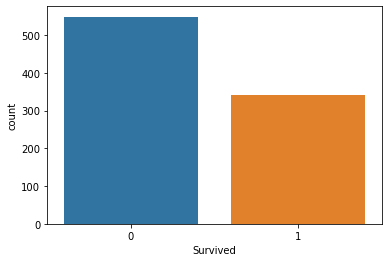

In [12]:
sns.countplot(x="Survived", data=df)

The Data is imbalanced. We have around 330 survived and around 560 died. We can treat the data for balancing using Smote technique later.

<AxesSubplot:xlabel='Survived', ylabel='count'>

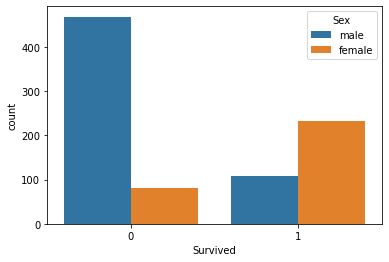

In [13]:
sns.countplot(x="Survived", data=df,hue='Sex')

The death count of the males are more compared to females. Also the survived count of females is high.
By the graph above we can say that at the time of sinking the survival of females were prioritized. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

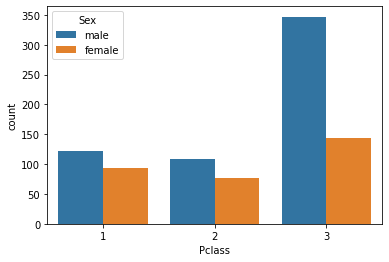

In [14]:
sns.countplot(x='Pclass', data=df, hue='Sex')

The passengers in the 3rd class are high compared to 1st and 2nd class. This must be due to other workers on the ship.

<AxesSubplot:xlabel='Survived', ylabel='count'>

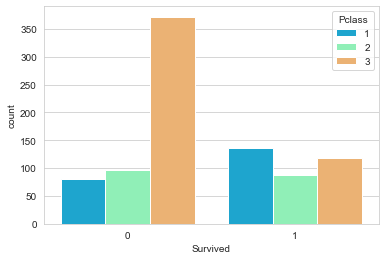

In [15]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=df,hue='Pclass',palette='rainbow')

Here we can see the 3rd class majority were the ones who lost their lives.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

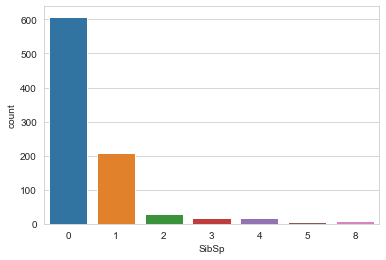

In [16]:
sns.countplot(x='SibSp',data=df)

Here we can see that passengers without no siblings/spouses are more.

<AxesSubplot:xlabel='Parch', ylabel='count'>

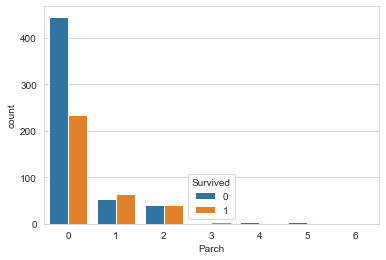

In [17]:
sns.countplot(x='Parch',data=df,hue='Survived')

Here we can see that the most survived people were not travelling with parents or children.

<AxesSubplot:xlabel='Age'>

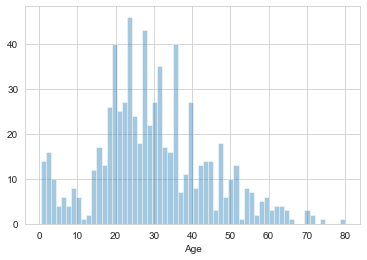

In [18]:
sns.distplot(df['Age'].dropna(),kde=False,bins=60)

The passengers on titanic were most aged between 20 and 30. As seen above.

<AxesSubplot:xlabel='Fare'>

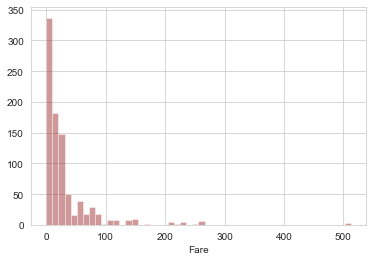

In [19]:
sns.distplot(df['Fare'].dropna(),kde=False,bins=50,color='darkred')

As seen above we can say that around 330 passengers did not pay for the ticket, these must be workers/staff on the ship.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

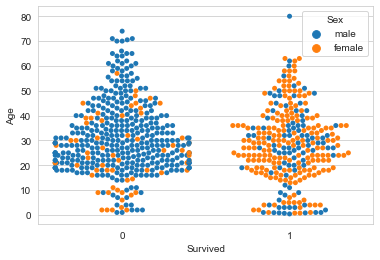

In [20]:
sns.swarmplot(x=df['Survived'],y=df['Age'], hue=df['Sex'])

The passenger with age of 80 male survived. Also most of the passengers aged between 50 to 80 died. 

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

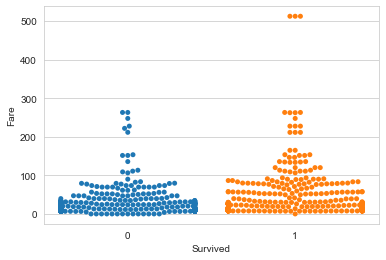

In [21]:
sns.swarmplot(x=df['Survived'],y=df['Fare'])

Here we can see the person who paid the highest fare survived. The ones who have not paid the fare have died except for one.

## filling NaN values in the dataset

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

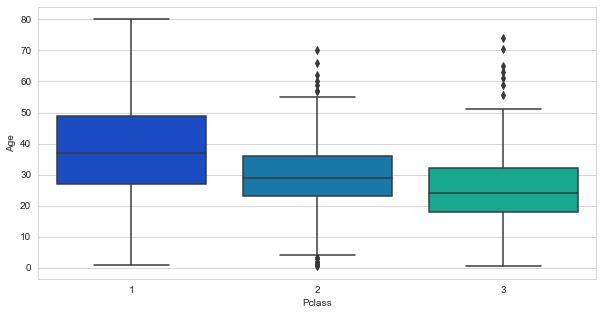

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',palette='winter', data=df)

1. There are 3 passenger class in our dataset.
2. We notice here wealtheir in higher class seems older which makes sense. we'll use this average age values to impute based on Pclass for age.
3. Here we can see Pclass 1 average of age is arond 37 and Pclass 2 it's around 29 Pclass 3 it's around 24.
So filling the age NaN values with average of Age.

In [23]:
# create a function to fill the missing age data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [24]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:ylabel='PassengerId'>

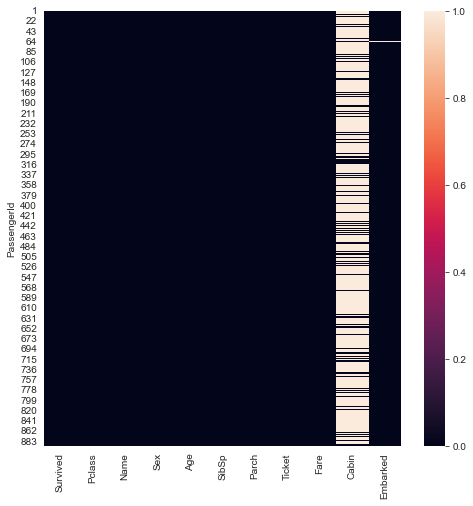

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

As we can see the Age column is filled

In [26]:
df.drop('Cabin', axis=1, inplace=True)

we have dropped the cabin value as it contains 77% mising data.

In [27]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Here we can see there are 2 null values present in embarked column

We can fill this with mode 

In [29]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

<AxesSubplot:ylabel='PassengerId'>

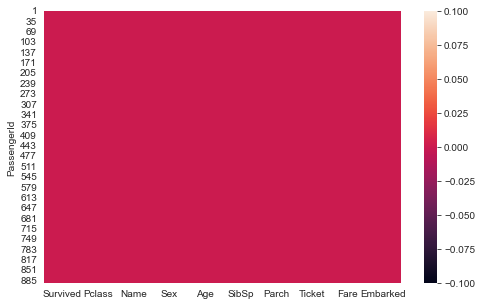

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

As you can see above, we have filled and removed the NaN values present in the dataset. 

#### Dropping the unnecessary columns in the dataset

In [31]:
df.drop('Name', axis=1, inplace=True)

In [32]:
df.drop('Ticket', axis=1, inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [34]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

As we can see there are no null values present now in the dataset.

In [35]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

We have int64(4), object(2) and float64(2) values in the data set.

We have to convert the object data(Categorical data) to numerical data.

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['Embarked']= le.fit_transform(df['Embarked'])

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [38]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [39]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

So here from the above 2 cells we can notice that now we don't have any null value present in the data set and data have int64(6) and float64(2) values.

#### Checking For outliers

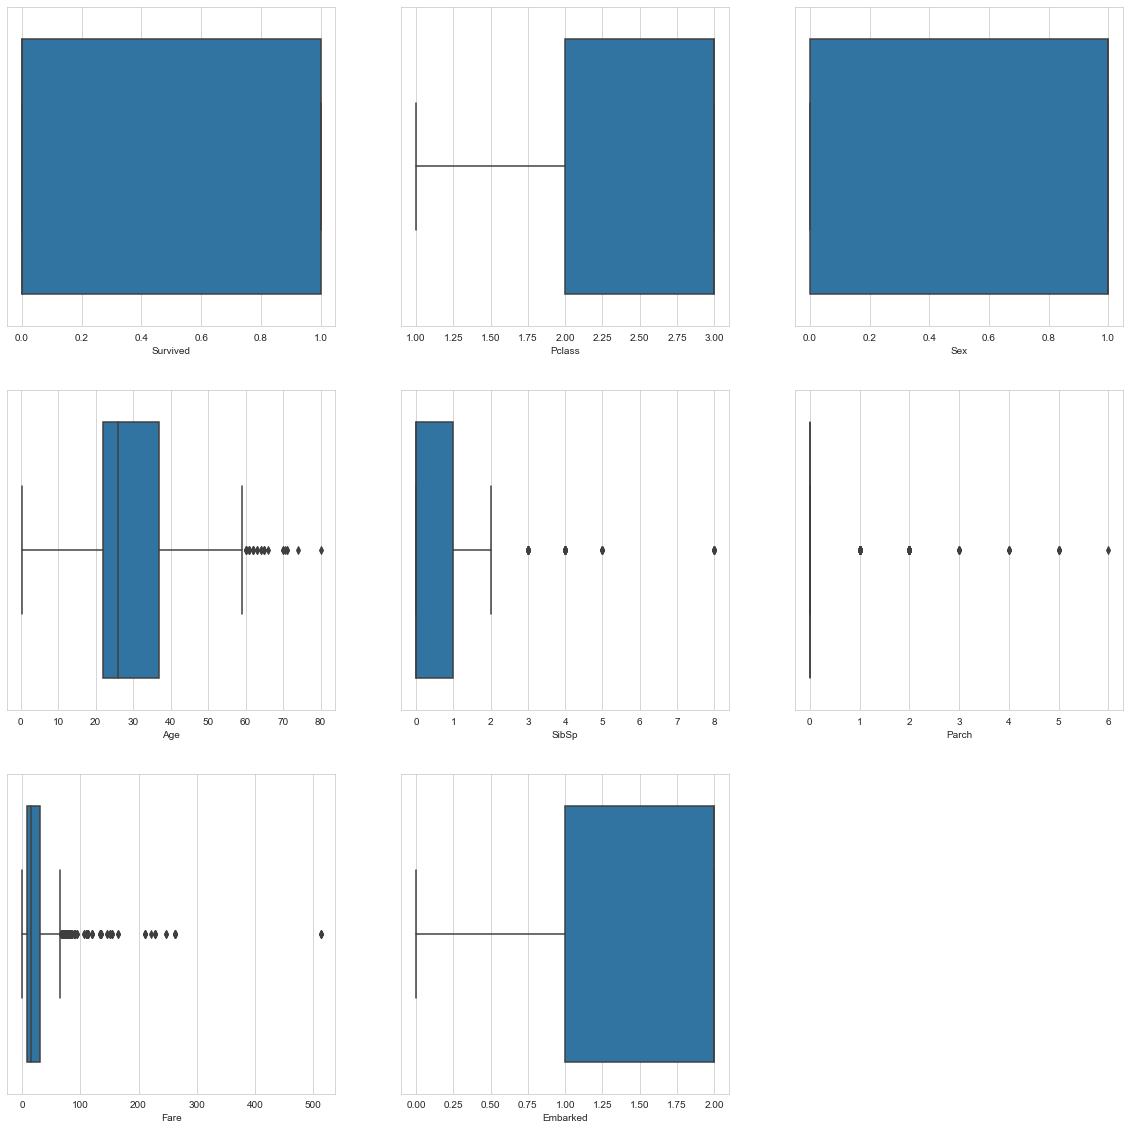

In [40]:
plt.figure(figsize=(20,20))
for i in enumerate(df.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

The outliers are present in Age, SibSp, Parch and Fare

#### Zscore Method

In [41]:
#Splitting the data to remove outliers
x= df.drop(['Survived'], axis=1)
y= df['Survived']
print(x.shape)
print(y.shape)

(891, 7)
(891,)


In [42]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0.827377,0.737695,0.533834,0.432793,0.473674,0.502445,0.585954
2,1.566107,1.355574,0.674891,0.432793,0.473674,0.786845,1.942303
3,0.827377,1.355574,0.231653,0.474545,0.473674,0.488854,0.585954
4,1.566107,1.355574,0.448255,0.432793,0.473674,0.420730,0.585954
5,0.827377,0.737695,0.448255,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...
887,0.369365,0.737695,0.156107,0.474545,0.473674,0.386671,0.585954
888,1.566107,1.355574,0.760469,0.474545,0.473674,0.044381,0.585954
889,0.827377,1.355574,0.382743,0.432793,2.008933,0.176263,0.585954


In [43]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [44]:
z.iloc[13][4]

5.73284383018578

In [45]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(891, 8)
(820, 8)


In [46]:
# Data loss percentage using zscore method
a=((891-820)/891)*100
a

7.968574635241302

#### IQR Method 

In [47]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR=Q3-Q1
df2=x[~((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

(589, 7)

In [48]:
# Data loss percentage using IQR method
b=((891-589)/891)*100
b

33.89450056116723

The Data loss percentage is 7.96% using zscore and 33.89% using IQR. Only 10% of data loss is acceptable. Hence i am selecting zscore method.

In [49]:
df=df1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,24.0,1,2,23.4500,2


#### Checking for skewness

In [50]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.447804
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

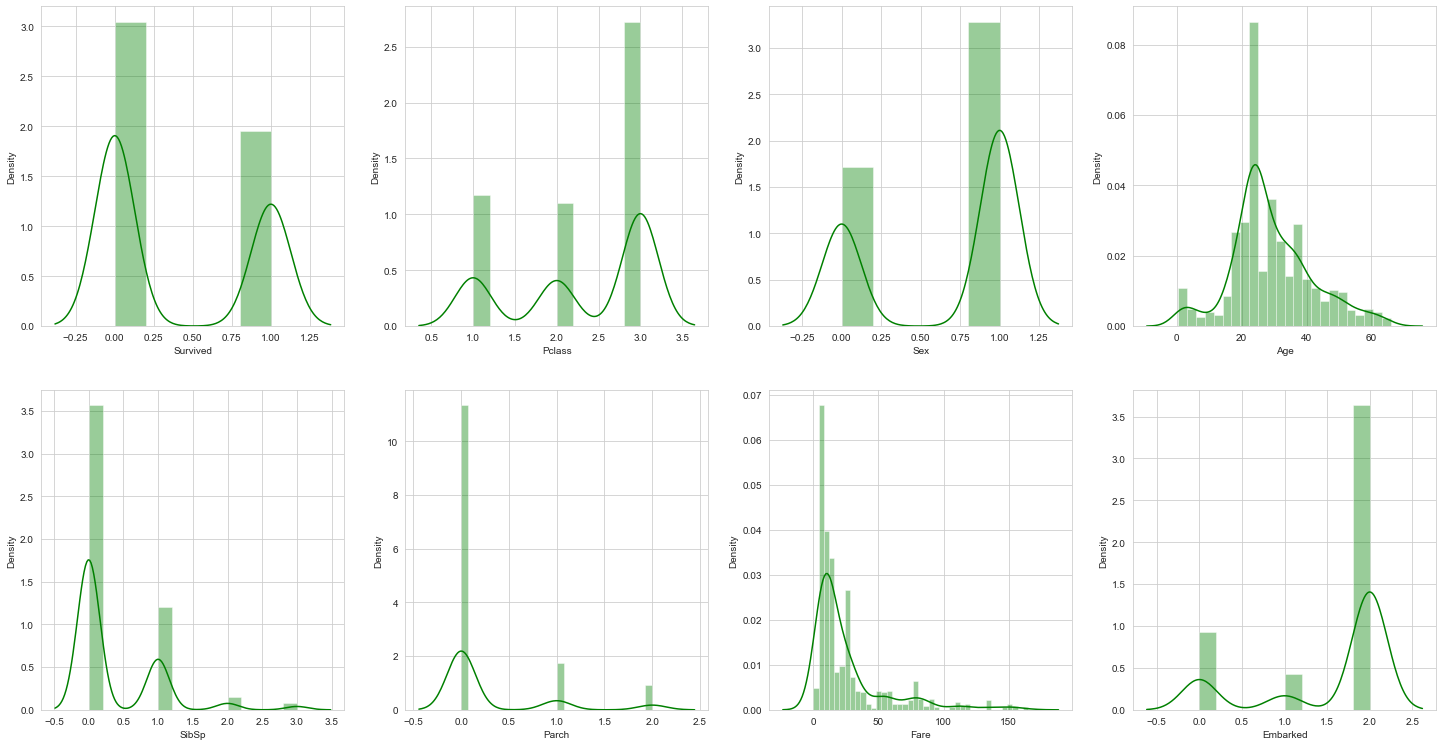

In [51]:
plt.figure(figsize=(25,20))
for i in enumerate(df):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

As we can see there is skewness present in:
1. Pclass
2. Sex
3. SibSp
4. Parch
5. Fare
6. Embarked

But we only treat Numerical Columns which are:
1. Pclass
2. SibSp
3. Parch
4. Fare

In [52]:
# using power transform method
from sklearn.preprocessing import power_transform
df[['Pclass','SibSp','Parch','Fare']]=power_transform(df[['Pclass','SibSp','Parch','Fare']],method='yeo-johnson')

In [53]:
df.skew()

Survived    0.450825
Pclass     -0.429718
Sex        -0.664152
Age         0.447804
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -1.277386
dtype: float64

As we can see we have reduced the skewness in Pclass, SibSp, Parch and Fare

## Correlation between variables

In [54]:
dfcor=df.corr()
dfcor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.322666,-0.554888,-0.065634,0.158793,0.211061,0.364889,-0.154994
Pclass,-0.322666,1.000000,0.142759,-0.400984,-0.136516,-0.087302,-0.661844,0.097043
Sex,-0.554888,0.142759,1.000000,0.086990,-0.212974,-0.252655,-0.271353,0.116708
Age,-0.065634,-0.400984,0.086990,1.000000,-0.087124,-0.228705,0.185945,0.012398
SibSp,0.158793,-0.136516,-0.212974,-0.087124,1.000000,0.347320,0.404340,-0.058986
Parch,0.211061,-0.087302,-0.252655,-0.228705,0.347320,1.000000,0.310071,-0.028470
Fare,0.364889,-0.661844,-0.271353,0.185945,0.404340,0.310071,1.000000,-0.181680
Embarked,-0.154994,0.097043,0.116708,0.012398,-0.058986,-0.028470,-0.181680,1.000000


<AxesSubplot:>

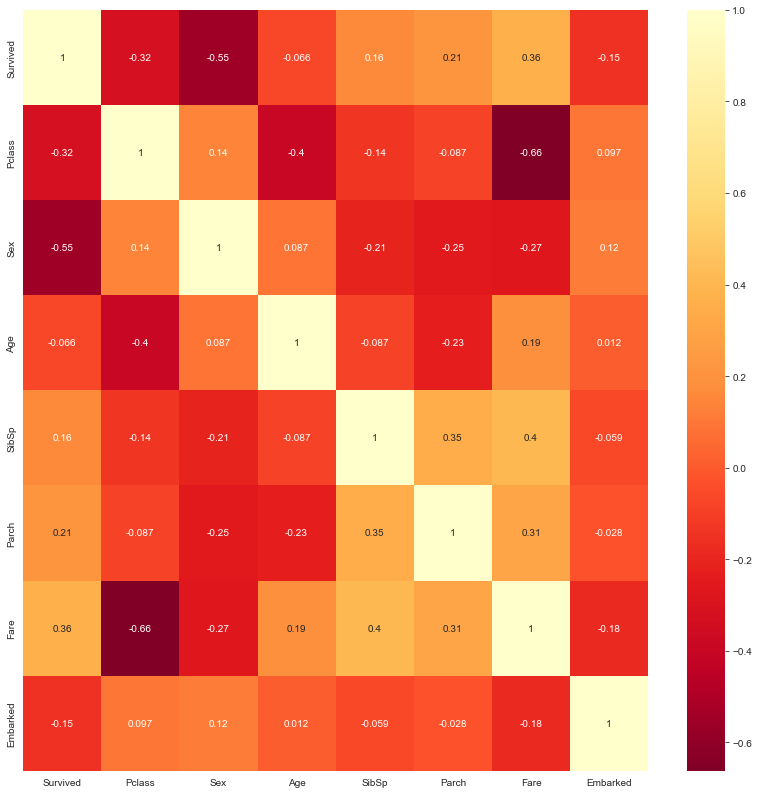

In [55]:
plt.figure(figsize=(14,14))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:
1. The Pclass is less negatively correlated to our target variable Survived.
2. The Sex is moderately correlated to our target variable.
3. The Embarked is negatively correlated to our target variable.
4. Fare and Survived is moderately correlated to each other.
5. The Parch is less correlated to the target variavle.

## Checking Multicolinearity

In [56]:
#Splitting the data
x= df.drop(['Survived'], axis=1)
y= df['Survived']

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["faetures"]=x.columns
    print(vif)

In [58]:
vif_calc()

   VIF Factor  faetures
0    1.979299    Pclass
1    3.011627       Sex
2    4.472026       Age
3    1.317841     SibSp
4    1.252841     Parch
5    2.347129      Fare
6    3.809307  Embarked


As we can see the values are not so high so we do not have to remove any data.

## Feature Scaling using MinMax Scaler

In [59]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6
0,1.000000,1.0,0.329064,0.926317,0.0,0.445667,1.0
1,0.000000,0.0,0.573041,0.926317,0.0,0.855230,0.0
2,1.000000,0.0,0.390058,0.000000,0.0,0.461339,1.0
3,0.000000,0.0,0.527295,0.926317,0.0,0.803218,1.0
4,1.000000,1.0,0.527295,0.000000,0.0,0.464103,1.0
...,...,...,...,...,...,...,...
815,0.373447,1.0,0.405306,0.000000,0.0,0.549814,1.0
816,0.000000,0.0,0.283318,0.000000,0.0,0.701010,1.0
817,1.000000,0.0,0.359561,0.926317,1.0,0.656525,1.0
818,0.000000,1.0,0.390058,0.000000,0.0,0.701010,0.0


In [60]:
x.columns=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.329064,0.926317,0.0,0.445667,1.0
1,0.0,0.0,0.573041,0.926317,0.0,0.855230,0.0
2,1.0,0.0,0.390058,0.000000,0.0,0.461339,1.0
3,0.0,0.0,0.527295,0.926317,0.0,0.803218,1.0
4,1.0,1.0,0.527295,0.000000,0.0,0.464103,1.0


Imbalanced data

In [61]:
print(y.value_counts())

0    500
1    320
Name: Survived, dtype: int64


Resampling using Random Under Sampler

In [62]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x, y= rus.fit_resample(x,y)

In [63]:
y.value_counts()

0    320
1    320
Name: Survived, dtype: int64

Now the Data is balanced

# Model

Finding the best random state

In [64]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ",maxAccu," At random state ",maxRS)

Best Accuracy is  0.84375  At random state  145


#### Spliting Train and Test Data

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(448, 7)
(192, 7)
(448,)
(192,)


## Finding the best Model

In [67]:
# Importing necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#### 1. Logistic Regression

In [68]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))
print("Training accuracy::",LG.score(x_train,y_train))
print("Test accuracy::",LG.score(x_test,y_test))

0.7760416666666666
[[75 18]
 [25 74]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        93
           1       0.80      0.75      0.77        99

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.78      0.78      0.78       192

Training accuracy:: 0.7700892857142857
Test accuracy:: 0.7760416666666666


#### 2. Decision Tree Classifier

In [69]:
print('DTC for Gini')
DTC1=DecisionTreeClassifier(criterion='gini')
DTC1.fit(x_train,y_train)
predDTC1=DTC1.predict(x_test)
print(accuracy_score(y_test,predDTC1))
print(confusion_matrix(y_test,predDTC1))
print(classification_report(y_test,predDTC1))
print("Training accuracy::",DTC1.score(x_train,y_train))
print("Test accuracy::",DTC1.score(x_test,y_test))
print('\n')

print('DTC for Entropy')
DTC2=DecisionTreeClassifier(criterion='entropy')
DTC2.fit(x_train,y_train)
predDTC2=DTC2.predict(x_test)
print(accuracy_score(y_test,predDTC2))
print(confusion_matrix(y_test,predDTC2))
print(classification_report(y_test,predDTC2))
print("Training accuracy::",DTC2.score(x_train,y_train))
print("Test accuracy::",DTC2.score(x_test,y_test))

DTC for Gini
0.8072916666666666
[[73 20]
 [17 82]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        93
           1       0.80      0.83      0.82        99

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192

Training accuracy:: 0.9799107142857143
Test accuracy:: 0.8072916666666666


DTC for Entropy
0.796875
[[74 19]
 [20 79]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        93
           1       0.81      0.80      0.80        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.9799107142857143
Test accuracy:: 0.796875


DTC is working better with Gini criterion

In [70]:
DTC=DecisionTreeClassifier(criterion='gini')
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))
print("Training accuracy::",DTC.score(x_train,y_train))
print("Test accuracy::",DTC.score(x_test,y_test))

0.796875
[[73 20]
 [19 80]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        93
           1       0.80      0.81      0.80        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.9799107142857143
Test accuracy:: 0.796875


#### 3. KNeighbors Classifier

In [71]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))
print("Training accuracy::",KNN.score(x_train,y_train))
print("Test accuracy::",KNN.score(x_test,y_test))

0.7760416666666666
[[73 20]
 [23 76]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        93
           1       0.79      0.77      0.78        99

    accuracy                           0.78       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.78      0.78      0.78       192

Training accuracy:: 0.8058035714285714
Test accuracy:: 0.7760416666666666


#### 4. Support Vector Classifier

In [72]:
print('SV for rbf')
SV1=SVC(kernel='rbf')
SV1.fit(x_train,y_train)
predSV1=SV1.predict(x_test)
print(accuracy_score(y_test,predSV1))
print(confusion_matrix(y_test,predSV1))
print(classification_report(y_test,predSV1))
print("Training accuracy::",SV1.score(x_train,y_train))
print("Test accuracy::",SV1.score(x_test,y_test))
print('\n')

print('SV for poly')
SV2=SVC(kernel='poly')
SV2.fit(x_train,y_train)
predSV2=SV2.predict(x_test)
print(accuracy_score(y_test,predSV2))
print(confusion_matrix(y_test,predSV2))
print(classification_report(y_test,predSV2))
print("Training accuracy::",SV2.score(x_train,y_train))
print("Test accuracy::",SV2.score(x_test,y_test))
print('\n')

print('SV for linear')
SV3=SVC(kernel='linear')
SV3.fit(x_train,y_train)
predSV3=SV3.predict(x_test)
print(accuracy_score(y_test,predSV3))
print(confusion_matrix(y_test,predSV3))
print(classification_report(y_test,predSV3))
print("Training accuracy::",SV3.score(x_train,y_train))
print("Test accuracy::",SV3.score(x_test,y_test))

SV for rbf
0.796875
[[77 16]
 [23 76]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        93
           1       0.83      0.77      0.80        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.8035714285714286
Test accuracy:: 0.796875


SV for poly
0.7916666666666666
[[79 14]
 [26 73]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        93
           1       0.84      0.74      0.78        99

    accuracy                           0.79       192
   macro avg       0.80      0.79      0.79       192
weighted avg       0.80      0.79      0.79       192

Training accuracy:: 0.8102678571428571
Test accuracy:: 0.7916666666666666


SV for linear
0.78125
[[79 14]
 [28 71]]
              precision    recall  f1-score   support

           0       

For SV rbf kernel is working better than other kernel

In [73]:
SV=SVC(kernel='rbf')
SV.fit(x_train,y_train)
predSV=SV.predict(x_test)
print(accuracy_score(y_test,predSV))
print(confusion_matrix(y_test,predSV))
print(classification_report(y_test,predSV))
print("Training accuracy::",SV.score(x_train,y_train))
print("Test accuracy::",SV.score(x_test,y_test))

0.796875
[[77 16]
 [23 76]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        93
           1       0.83      0.77      0.80        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.8035714285714286
Test accuracy:: 0.796875


#### 5. Random Forest Classifier

In [74]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))
print("Training accuracy::",RF.score(x_train,y_train))
print("Test accuracy::",RF.score(x_test,y_test))

0.8333333333333334
[[75 18]
 [14 85]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        93
           1       0.83      0.86      0.84        99

    accuracy                           0.83       192
   macro avg       0.83      0.83      0.83       192
weighted avg       0.83      0.83      0.83       192

Training accuracy:: 0.9799107142857143
Test accuracy:: 0.8333333333333334


#### 6. Ada Boost Classifier

In [75]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))
print("Training accuracy::",ABC.score(x_train,y_train))
print("Test accuracy::",ABC.score(x_test,y_test))

0.796875
[[77 16]
 [23 76]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        93
           1       0.83      0.77      0.80        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.8147321428571429
Test accuracy:: 0.796875


#### 7. Bagging Classifier

In [76]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))
print("Training accuracy::",BC.score(x_train,y_train))
print("Test accuracy::",BC.score(x_test,y_test))

0.8072916666666666
[[74 19]
 [18 81]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        93
           1       0.81      0.82      0.81        99

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192

Training accuracy:: 0.9598214285714286
Test accuracy:: 0.8072916666666666


#### 8. Gradient Boosting Classifier

In [77]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))
print("Training accuracy::",GBC.score(x_train,y_train))
print("Test accuracy::",GBC.score(x_test,y_test))

0.8020833333333334
[[74 19]
 [19 80]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        93
           1       0.81      0.81      0.81        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.8950892857142857
Test accuracy:: 0.8020833333333334


#### 9. Extra Trees Classifier

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))
print("Training accuracy::",ET.score(x_train,y_train))
print("Test accuracy::",ET.score(x_test,y_test))

0.796875
[[69 24]
 [15 84]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        93
           1       0.78      0.85      0.81        99

    accuracy                           0.80       192
   macro avg       0.80      0.80      0.80       192
weighted avg       0.80      0.80      0.80       192

Training accuracy:: 0.9799107142857143
Test accuracy:: 0.796875


## Cross Validation to avoid overfitting and underfitting

In [79]:
from sklearn.model_selection import cross_val_score
log_score=cross_val_score(LG,x,y,scoring='accuracy')
print("logistic regression mean cv = ",np.mean(log_score))

logistic regression mean cv =  0.775


In [80]:
DTC_score=cross_val_score(DTC,x,y,scoring='accuracy')
print("Decision Tree mean cv = ",np.mean(DTC_score))

Decision Tree mean cv =  0.74375


In [81]:
KNN_score=cross_val_score(KNN,x,y,scoring='accuracy')
print("KNeighbor Classifier mean cv = ",np.mean(KNN_score))

KNeighbor Classifier mean cv =  0.746875


In [82]:
SV_score=cross_val_score(SV,x,y,scoring='accuracy')
print("Support Vector mean cv = ",np.mean(SV_score))

Support Vector mean cv =  0.7734375


In [83]:
RF_score=cross_val_score(RF,x,y,scoring='accuracy')
print("Random Forest mean cv = ",np.mean(RF_score))

Random Forest mean cv =  0.775


In [84]:
ABC_score=cross_val_score(ABC,x,y,scoring='accuracy')
print("Ada Boost mean cv = ",np.mean(ABC_score))

Ada Boost mean cv =  0.775


In [85]:
BC_score=cross_val_score(BC,x,y,scoring='accuracy')
print("Bagging Classifier mean cv = ",np.mean(BC_score))

Bagging Classifier mean cv =  0.778125


In [86]:
GBC_score=cross_val_score(GBC,x,y,scoring='accuracy')
print("Gradient Boosting mean cv = ",np.mean(GBC_score))

Gradient Boosting mean cv =  0.7859375


In [87]:
ET_score=cross_val_score(ET,x,y,scoring='accuracy')
print("Extra Trees mean cv = ",np.mean(ET_score))

Extra Trees mean cv =  0.753125


From the above Cross validation Technique we can see that the best model is with the highest accuracy and that is Gradient Boosting Classifier

# Hyper Parameter Tunning

In [88]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion": ["friedman_mse",  "squared_error"],
            "loss":["log_loss","deviance","exponential"],
            "max_features":["log2","sqrt","None"],
            'learning_rate': [0.01,0.05,0.1,1,0.5], 
            'max_depth': [3,4,5],
            'min_samples_leaf': [1,4,5,6],
            'subsample': [0.6,0.7,0.8,1.0],
            'n_estimators': [5,10,15,20,100],
            }
GCV=GridSearchCV(GBC,parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1, 1, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['log2', 'sqrt', 'None'],
                         'min_samples_leaf': [1, 4, 5, 6],
                         'n_estimators': [5, 10, 15, 20, 100],
                         'subsample': [0.6, 0.7, 0.8, 1.0]})

In [89]:
best_parameters = GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 100, 'subsample': 0.7}
0.8079400749063671


In [90]:
Final_model=GradientBoostingClassifier(criterion='squared_error', loss='exponential', learning_rate=0.1, max_depth=4, max_features = 'log2', min_samples_leaf=5, n_estimators=100, subsample=0.7)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.29166666666666


## Plotting AUC and ROC curve

In [91]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [92]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]

In [93]:
print("roc auc score::",roc_auc_score(y_test,Final_model.predict(x_test)))

roc auc score:: 0.8233952427500815


In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

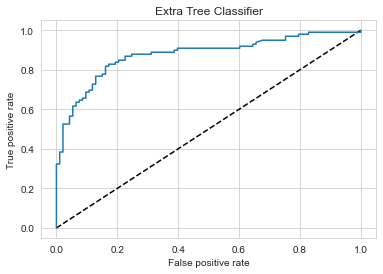

In [95]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Extra Tree Classifier')
plt.show()

# Saving the model

In [96]:
import pickle
filename='TitanicPrediction.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [97]:
model=pickle.load(open("TitanicPrediction.pkl","rb"))
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [98]:
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted"]=prediction
df4["Original"] = a
df4

,Predicted,Original
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
187,0,0
188,0,0
189,1,1
190,0,0
